In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

trans_df=pd.read_csv('fake_transactional_data_24.csv')
balances_df=pd.read_csv('simulated_transaction_2024.csv')

In [6]:
print("\n Transactions")
print(trans_df.head())

print("\n Balances")
print(balances_df.head())



 Transactions
   from_totally_fake_account  monopoly_money_amount  \
0                    10371.0                   4.00   
1                    88339.0                   2.40   
2                    18555.0                   2.40   
3                    18555.0                   4.10   
4                    80792.0                   1.95   

  to_randomly_generated_account not_happened_yet_date  
0                        CINEMA            01/01/2025  
1                         40544            01/01/2025  
2                         85149            01/01/2025  
3           HIPSTER_COFFEE_SHOP            01/01/2025  
4                         18555            01/01/2025  

 Balances
         Date Timestamp   Account No  Balance  Amount  Third Party Account No  \
0  01/01/2023     00:00  678330503.0   2971.0  1584.0                     NaN   
1  01/01/2023     00:00  472213568.0   3792.0  1950.0                     NaN   
2  01/01/2023     00:00  472213568.0   3012.0  -780.0           

Balance Summary: count    230350.000000
mean       3609.351057
std        5379.331174
min       -5790.983500
25%         373.453932
50%        1686.009850
75%        5215.031852
max       46804.158837
Name: Balance, dtype: float64


C:\Users\shubh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


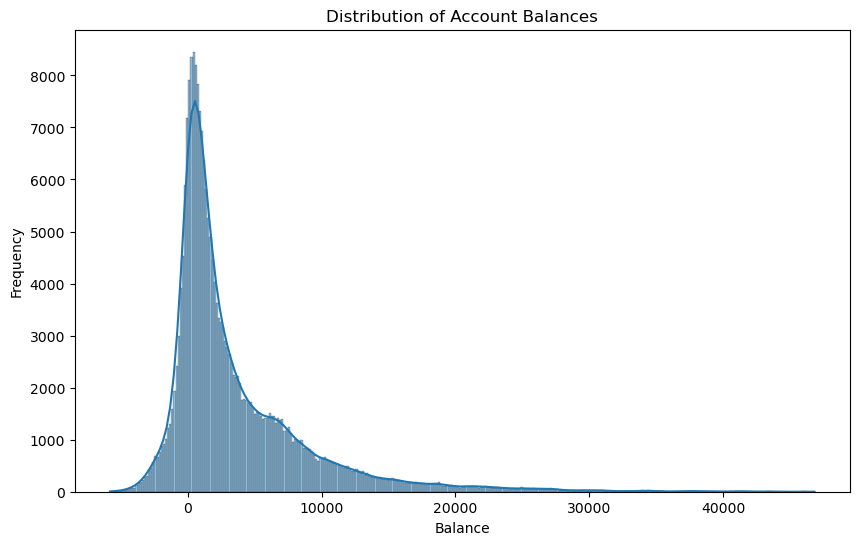

In [10]:
balance_summary=balances_df['Balance'].describe()
print("Balance Summary:",balance_summary)

plt.figure(figsize=(10,6))
sns.histplot(balances_df['Balance'], kde=True)  
plt.title("Distribution of Account Balances")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

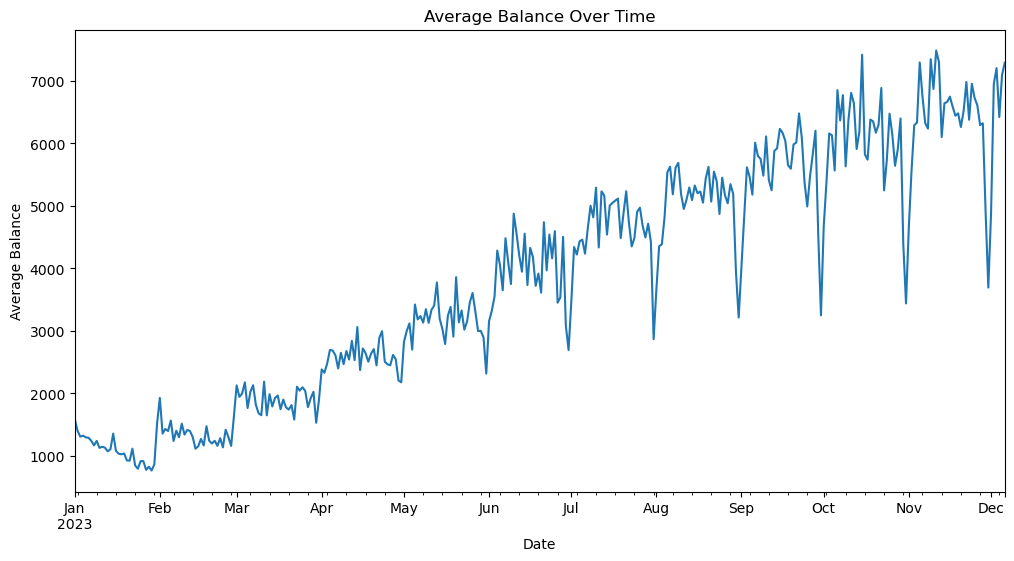

In [12]:
balances_df['Date'] = pd.to_datetime(balances_df['Date'],format="%d/%m/%Y")


daily_balances = balances_df.groupby('Date')['Balance'].mean()


plt.figure(figsize=(12, 6))
daily_balances.plot()
plt.title("Average Balance Over Time")
plt.xlabel("Date")
plt.ylabel("Average Balance")
plt.show()

In [14]:
highest_balances = balances_df.nlargest(10, 'Balance')  
print("Accounts with the Highest Balances:")
print(highest_balances)


lowest_balances = balances_df.nsmallest(10, 'Balance')  
print("Accounts with the Lowest Balances:")
print(lowest_balances)

Accounts with the Highest Balances:
             Date Timestamp   Account No       Balance   Amount  \
222131 2023-12-01     00:00  581655972.0  46804.158837  5833.00   
222623 2023-12-01     00:00  581655972.0  46184.158837  -620.00   
223872 2023-11-30     23:59  581655972.0  46168.168837   -15.99   
223873 2023-11-30     23:59  581655972.0  46149.178837   -18.99   
226731 2023-12-01     03:05  581655972.0  46125.637579   -23.54   
226937 2023-12-01     09:03  581655972.0  46119.487579    -6.15   
227638 2023-12-02     07:28  581655972.0  46100.005292   -19.48   
228139 2023-12-02     16:41  581655972.0  46073.045292   -26.96   
228386 2023-12-03     08:06  581655972.0  46068.498228    -4.55   
228520 2023-12-03     11:12  581655972.0  46058.508228    -9.99   

        Third Party Account No Third Party Name  
222131                     NaN  Premier Finance  
222623                     NaN              LBG  
223872                     NaN          Netflix  
223873                    

In [18]:
balances_df = balances_df.sort_values(by=['Account No', 'Date'])


balances_df['balance_change'] = balances_df.groupby('Account No')['Balance'].diff()

# Find the accounts with the most volatile balances
most_volatile = balances_df.groupby('Account No')['balance_change'].std().nlargest(10)  # Top 10 by volatility
print("Accounts with the Most Volatile Balances:")
print(most_volatile)

Accounts with the Most Volatile Balances:
Account No
554792076.0    2110.006710
581655972.0    1870.016578
419550103.0    1274.087101
567499591.0    1243.164372
920830317.0    1201.994419
172084472.0    1160.054306
386729293.0    1155.422809
550169791.0    1147.995282
724537117.0    1147.695327
975345315.0    1129.393635
Name: balance_change, dtype: float64


In [30]:

merged_df = pd.merge(trans_df, balances_df, left_on='from_totally_fake_account', right_on='Account No')


daily_transactions = merged_df.groupby(['Account No', 'Date'])['Amount'].sum()

# Merge with the daily balances to assess the correlation
merged_df = pd.merge(balances_df, daily_transactions.reset_index(), on=['Account No', 'Date'], how='left')

balance_transactions_df = pd.merge(balances_df, daily_transactions.reset_index(), on=['Account No', 'Date'], how='left')

correlation = balance_transactions_df[['balance_change', 'Amount_x']].corr()

print("Correlation Between Balance Change and Transaction Amounts:")
print(correlation)


Correlation Between Balance Change and Transaction Amounts:
                balance_change  Amount_x
balance_change        1.000000  0.589675
Amount_x              0.589675  1.000000


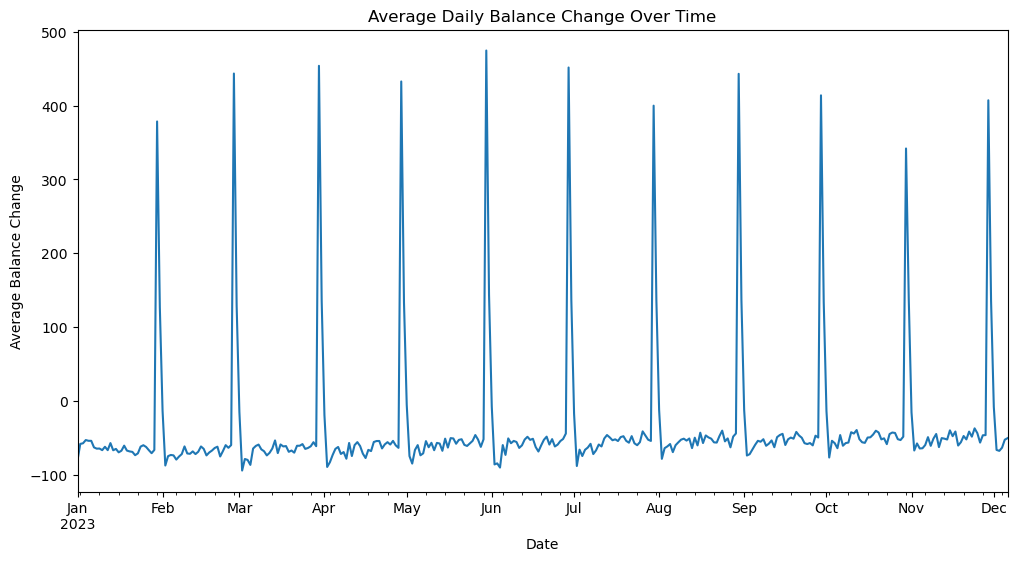

In [31]:
daily_balance_change = balances_df.groupby('Date')['balance_change'].mean()


plt.figure(figsize=(12, 6))
daily_balance_change.plot()
plt.title("Average Daily Balance Change Over Time")
plt.xlabel("Date")
plt.ylabel("Average Balance Change")
plt.show()

In [35]:

balances_df['Date'] = pd.to_datetime(balances_df['Date'], format='%d/%m/%Y')
balances_df['Timestamp'] = pd.to_datetime(balances_df['Timestamp'])


C:\Users\shubh\AppData\Local\Temp\ipykernel_9564\1729610091.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  balances_df['Timestamp'] = pd.to_datetime(balances_df['Timestamp'])


In [36]:
latest_balances = balances_df.groupby('Account No').apply(lambda group: group.loc[group['Date'].idxmax()])

In [37]:
top_1000_accounts = latest_balances.sort_values(by='Balance', ascending=False).head(1000)


In [39]:
print(top_1000_accounts)
top_1000_accounts.to_csv('top_1000_accounts.csv', index=False)

                  Date           Timestamp   Account No       Balance  \
Account No                                                              
581655972.0 2023-12-06 2024-04-30 20:54:00  581655972.0  45935.206861   
975345315.0 2023-12-06 2024-04-30 05:27:00  975345315.0  40981.620578   
639409800.0 2023-12-06 2024-04-30 08:39:00  639409800.0  40441.725867   
558119802.0 2023-12-06 2024-04-30 07:22:00  558119802.0  37767.280156   
386729293.0 2023-12-06 2024-04-30 17:48:00  386729293.0  35458.802448   
...                ...                 ...          ...           ...   
534097839.0 2023-12-06 2024-04-30 17:21:00  534097839.0  -5211.228550   
581618317.0 2023-12-01 2024-04-30 00:00:00  581618317.0  -5227.721702   
969697937.0 2023-12-03 2024-04-30 10:26:00  969697937.0  -5300.182766   
656781737.0 2023-12-01 2024-04-30 00:00:00  656781737.0  -5595.910000   
843174694.0 2023-12-04 2024-04-30 08:32:00  843174694.0  -5790.983500   

              Amount  Third Party Account No Third